In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [39]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [2]:
df=pd.read_csv('../data/Season_2017.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [5]:
df.home_win.value_counts(normalize=True)

1    0.539506
0    0.460494
Name: home_win, dtype: float64

In [13]:
df

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1,ARI,34.104938,5.012346,8.672840,4.790123,4.939444,3.567901,8.987654,38.419753,0.249259,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
2,STL,33.765432,4.697531,8.654321,4.493827,4.486728,3.660494,8.320988,38.388889,0.252457,...,11.839506,13.160494,6.592593,0.006173,49.012346,1.453416,0.472050,-0.011130,-0.415432,1
3,TEX,33.518519,4.932099,8.185185,4.666667,4.781358,3.358025,9.216049,37.790123,0.240247,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,0
4,MIL,33.691358,4.444444,8.351852,4.216049,4.273951,3.271605,9.697531,37.703704,0.243426,...,13.265432,13.413580,6.629630,0.018519,46.876543,1.465839,0.472050,0.015272,-0.198765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,SFG,34.265432,3.944444,8.530864,3.777778,3.593889,2.882716,7.432099,37.882716,0.243852,...,12.685185,13.333333,6.030864,0.024691,54.895062,1.161290,0.245161,0.042457,0.791358,1
2426,LAA,33.425926,4.382716,8.111111,4.185185,4.071914,3.228395,7.395062,37.487654,0.237475,...,11.166667,15.641975,6.697531,0.000000,49.648148,1.597484,0.471698,-0.007210,-0.064198,1
2427,CLE,34.018519,5.049383,8.944444,4.814815,4.994383,3.728395,7.117284,38.481481,0.256154,...,11.395062,15.160494,6.734568,0.018519,51.080247,1.343949,0.292994,0.041198,0.259259,1
2428,BOS,34.993827,4.845679,9.018519,4.537037,4.422037,3.524691,7.555556,39.148148,0.252994,...,11.654321,12.549383,5.950617,0.000000,46.932099,1.549383,0.586420,-0.084173,-1.018519,0


Split the data to train on the first 75% of the season to test on last 25%

In [29]:
n = 75
X_train=df.head(int(len(df)*(n/100)))

In [30]:
n = 25
X_test=df.tail(int(len(df)*(n/100)))

In [31]:
#for col in X_train.columns:
    #print(col)

In [32]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [33]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [34]:
y_train=X_train.home_win
y_test=X_test.home_win

In [35]:
X_train.drop(['home_win','H_name','A_name'],axis=1,inplace=True)
X_test.drop(['home_win','H_name','A_name'],axis=1,inplace=True)

In [36]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [30]:
X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [31]:
X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
                    'H_Opp_inherited_runners'],axis=1,inplace=True)

In [45]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

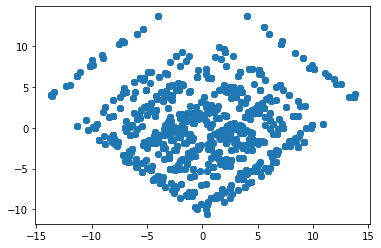

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [32]:
# def feature_select(X_train,y_train,estimator,min_features,step=1):
#     estimator2=estimator()
#     selector=RFECV(estimator2,min_features_to_select=min_features,step=step)
#     selector.fit(X_train,y_train)
#     selector.ranking_
#     feature_dict=dict(zip(X_train.columns, selector.ranking_))
#     best_pred = [k for (k,v) in feature_dict.items() if v == 1]
    
    
#     return best_pred

In [40]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [43]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

No deletion of Zero Importance:

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5708098750564503
Train Mean Accuracy: 0.5801317233809001
Test Mean Accuracy: 0.6029654036243822
Recall Score: 0.7138461538461538
Precision Score: 0.6105263157894737
F1 Score: 0.6581560283687943


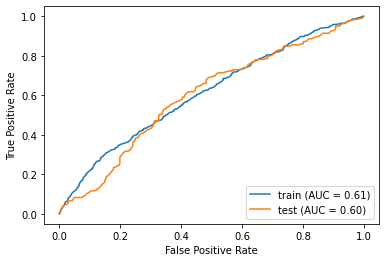

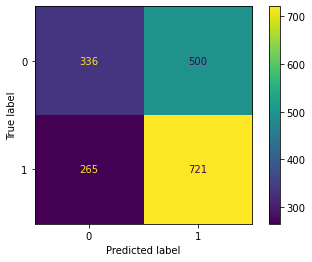

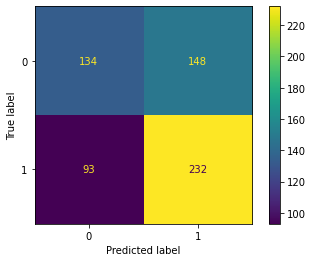

In [44]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

### zero imp
***

In [46]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [47]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5691434592804455
Train Mean Accuracy: 0.5729967069154775
Test Mean Accuracy: 0.5782537067545305
Recall Score: 0.7107692307692308
Precision Score: 0.5877862595419847
F1 Score: 0.6434540389972144


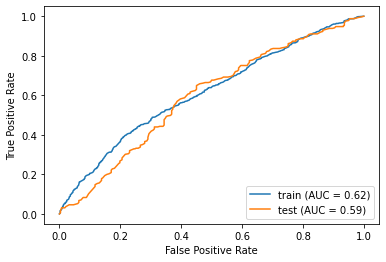

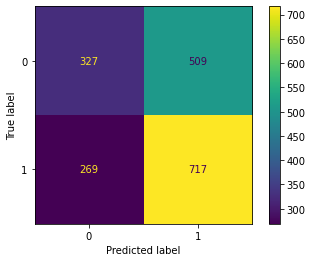

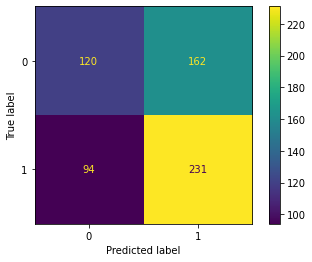

In [48]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

# KNN

### With Zero imp

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.531281047719404
Train Mean Accuracy: 0.6207464324917673
Test Mean Accuracy: 0.5683690280065898
Recall Score: 0.6646153846153846
Precision Score: 0.5853658536585366
F1 score: 0.622478386167147


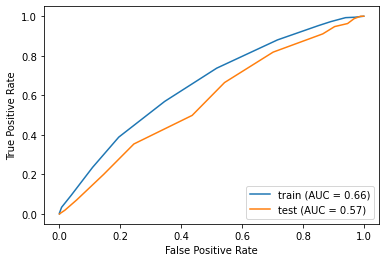

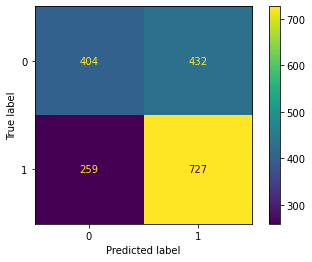

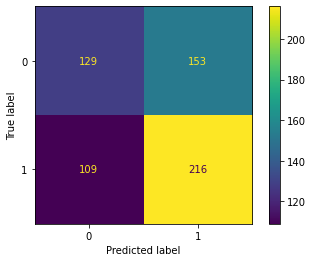

In [49]:
knn(X_train_scaled,X_test_scaled,y_train,y_test)

### Drop Zero Imp

Number of Neighbors: 13
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5334833659491194
Train Mean Accuracy: 0.6267837541163557
Test Mean Accuracy: 0.5551894563426688
Recall Score: 0.64
Precision Score: 0.5761772853185596
F1 score: 0.6064139941690962


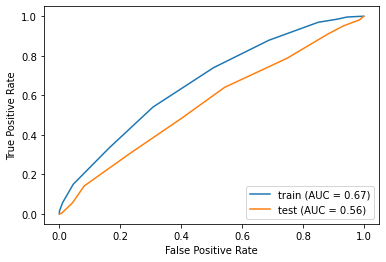

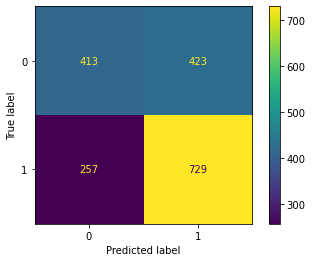

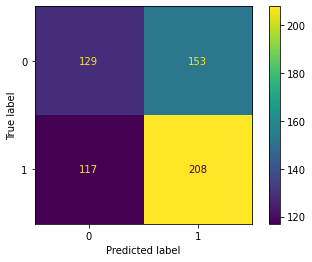

In [50]:
knn(zero_imp_train,zero_imp_test,y_train,y_test)

# Decision Tree

In [51]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree with Zero Imp

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5609182598223693
Train Mean Accuracy: 0.5954994511525796
Test Mean Accuracy: 0.5601317957166392
Recall Score: 0.7753846153846153
Precision Score: 0.5650224215246636
F1 score: 0.6536964980544746


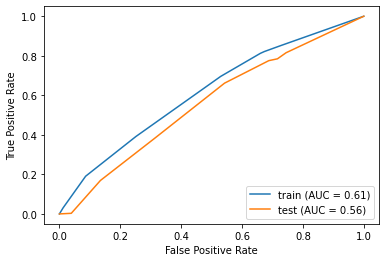

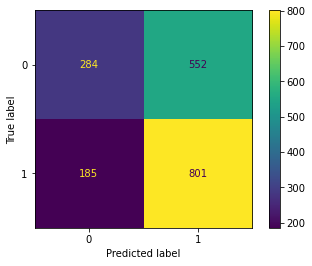

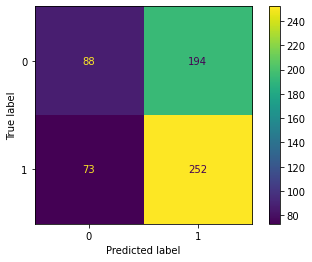

In [52]:
dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

### Dtree drop zero imp

In [53]:
dfeats= feature_select(zero_imp_train,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = zero_imp_train[dfeats]
X_test_best_tree = zero_imp_test[dfeats]

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.5466641577600481
Train Mean Accuracy: 0.5911086717892426
Test Mean Accuracy: 0.5667215815485996
Recall Score: 0.6615384615384615
Precision Score: 0.5842391304347826
F1 score: 0.6204906204906204


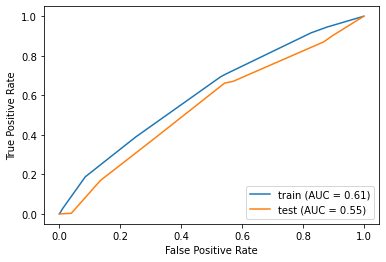

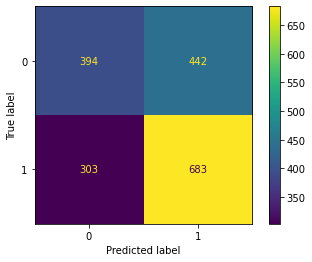

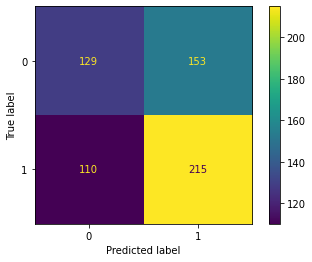

In [54]:
dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

# Random Forest

### RF with Zero Imp

In [55]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.5181138040042149
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.5189456342668863
Recall Score: 0.5907692307692308
Precision Score: 0.5470085470085471
F1 score: 0.5680473372781065


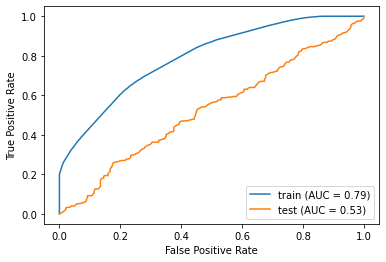

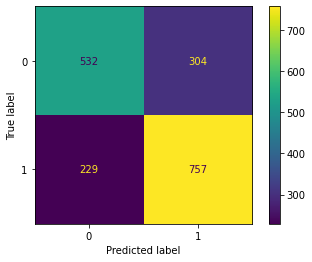

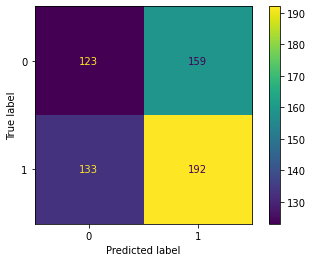

In [56]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

### RF drop Zero Imp

In [57]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 115
criterion: gini
Mean Cross-Val Score: 0.5192142104470872
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.515650741350906
Recall Score: 0.6
Precision Score: 0.5431754874651811
F1 score: 0.5701754385964913


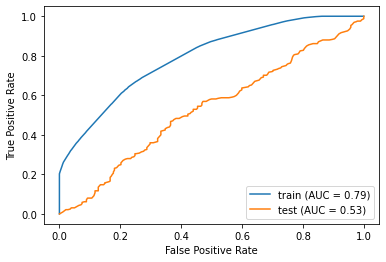

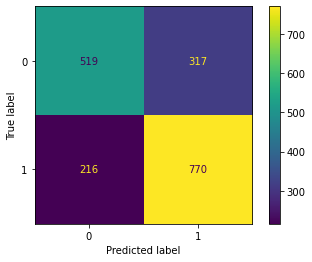

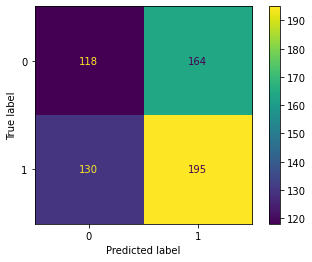

In [58]:
random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 5
Bag Max Features: 5
# of Base Estimators: 500
Mean Cross-Val Score: 0.576275779015505
Train Mean Accuracy Score: 0.562019758507135
Test Mean Accuracy Score: 0.5634266886326195
Recall Score: 0.9015384615384615
Precision Score: 0.5570342205323194
F1 score: 0.6886016451233843


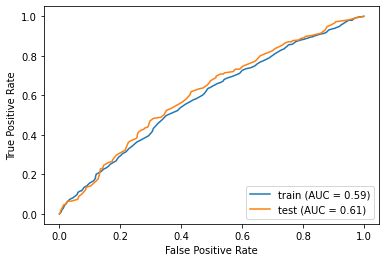

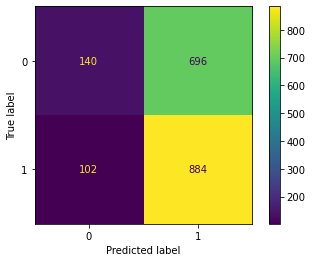

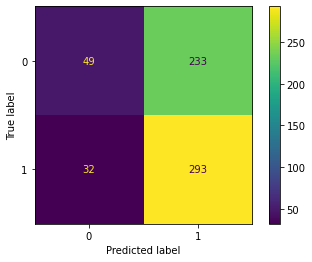

In [59]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [60]:
xfeats= feature_select(X_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = X_train[xfeats]
X_test_best_x = X_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 2
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5120668372723167
Train Mean Accuracy Score: 0.7074643249176729
Test Mean Accuracy Score: 0.5337726523887973
Recall Score: 0.6092307692307692
Precision Score: 0.559322033898305
F1 score: 0.5832106038291605


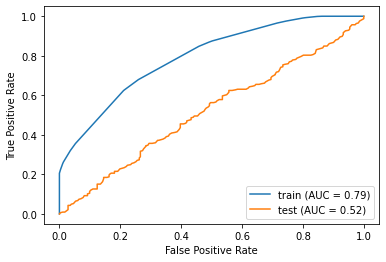

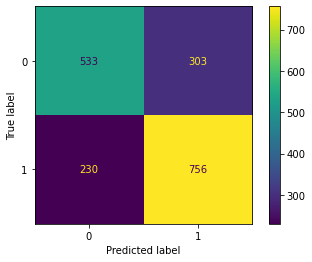

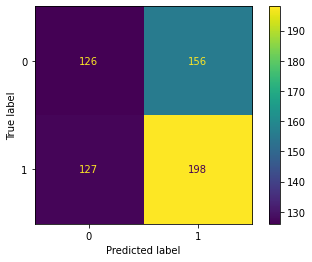

In [61]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)